# 1. 50 Random Parabolic 

[[   -0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [   -0.   -1016.05]
 [    0.   -1016.05]
 [    0.   -1

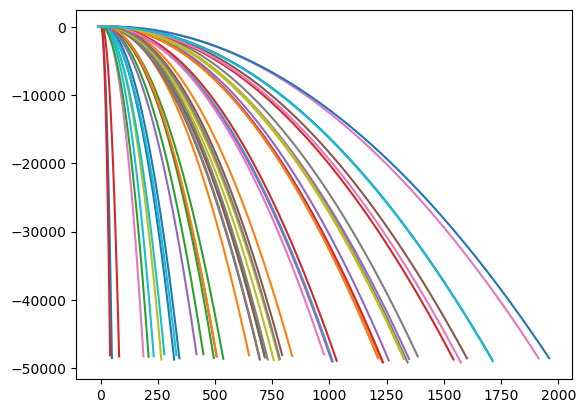

In [33]:
#50 parabolic 
import numpy as np
import matplotlib.pyplot as plt
import csv
import json

filename = 'parabolic_trajectory.csv'
N = 50 

x0 = np.random.uniform(low=-10, high=10, size=(N, 1))  # 초기 x위치
y0 = np.random.uniform(low=0, high=20, size=(N, 1))  # 초기 y위치
v0 = np.random.uniform(low=20, high=30, size=(N, 1))  # 초기 속도 크기
theta0 = np.random.uniform(low=np.pi/4, high=np.pi/2, size=(N, 1))  # 초기 각도
vx0 = v0 * np.cos(theta0)  # 초기 x방향 속도
vy0 = v0 * np.sin(theta0)  # 초기 y방향 속도
g = np.random.uniform(low=9.8, high=10.2)  # 중력 가속도 랜덤 생성

dt = 0.1  # 시간 간격
T = 10  # 시뮬레이션 시간

trajectory = np.zeros((N, int(T/dt)+1, 2))  # 물체별 위치를 저장할 배열 초기화 (물체id 시간 xy)
trajectory[:, 0] = np.hstack((x0, y0)) 

for t in range(1, int(T/dt)+1):
    x = x0 + vx0*t 
    y = y0 + vy0*t - 0.5*g*t**2 
    trajectory[:, t] = np.hstack((x, y)) 

    
# id별 평균 가속도 구하기
acceleration = np.zeros((N, 2))
for i in range(N):
    vx = (trajectory[i, 1:, 0] - trajectory[i, :-1, 0]) / dt # x방향 속도
    vy = (trajectory[i, 1:, 1] - trajectory[i, :-1, 1]) / dt # y방향 속도
    ax = (vx[1:] - vx[:-1]) / dt # x방향 가속도
    ay = (vy[1:] - vy[:-1]) / dt # y방향 가속도
    acceleration[i] = [round(np.mean(ax),2), round(np.mean(ay),2)]
print(acceleration)


# csv 파일로 저장
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['time', 'id', 'x', 'y'])

    for i in range(N):
        for t in range(int(T/dt)+1):
            writer.writerow([t*dt, i, trajectory[i, t, 0], trajectory[i, t, 1]])
            
            
filename1 = 'parabolic_2.json'

# json 파일로 저장
trajectory_dict = {}
#trajectory_dict["g"] = g  # 중력 가속도 저장
for i in range(N):
    traj_dict = {}
    for t in range(trajectory.shape[1]):
        traj_dict[t*dt] = [trajectory[i, t, 0], trajectory[i, t, 1]]
    trajectory_dict[str(i)] = traj_dict

with open(filename1, 'w') as jsonfile:
    json.dump(trajectory_dict, jsonfile)

for i in range(N):
    plt.plot(trajectory[i, :, 0], trajectory[i, :, 1])
plt.show()


In [31]:
import json

with open('parabolic_2.json') as f:
    data = json.load(f)

print(data)

{'0': {'0.0': [-3.8118879313544074, 0.5036092702113848], '0.1': [11.571463104587774, 18.149810960973287], '0.2': [26.954814140529955, 25.98158986313584], '0.30000000000000004': [42.33816517647214, 23.998945976699048], '0.4': [57.72151621241432, 12.201879301662913], '0.5': [73.1048672483565, -9.409610161972566], '0.6000000000000001': [88.48821828429868, -40.83552241420739], '0.7000000000000001': [103.87156932024087, -82.07585745504159], '0.8': [119.25492035618305, -133.13061528447508], '0.9': [134.6382713921252, -193.99979590250797], '1.0': [150.0216224280674, -264.68339930914016], '1.1': [165.40497346400957, -345.1814255043717], '1.2000000000000002': [180.78832449995176, -435.49387448820266], '1.3': [196.17167553589394, -535.6207462606329], '1.4000000000000001': [211.55502657183612, -645.5620408216625], '1.5': [226.9383776077783, -765.3177581712914], '1.6': [242.3217286437205, -894.8878983095198], '1.7000000000000002': [257.7050796796627, -1034.2724612363475], '1.8': [273.0884307156048

## 1.1 Find acceleration 

In [25]:
#포물선운동 가속도 찾기 
import json

json_data = '{"0": {"0": [2.2729399519240623, 9.02561926257025], "1": [14.590221682770393, 31.295892747443546], "2": [26.907503413616723, 43.70966502054267], "3": [39.224785144463056, 46.266936081867605], "4": [51.54206687530939, 38.96770593141838], "5": [63.85934860615572, 21.811974569194973], "6": [76.17663033700204, -5.200258004802606], "7": [88.49391206784837, -42.06899179057436], "8": [100.8111937986947, -88.79422678812028], "9": [113.12847552954103, -145.3759629974404], "10": [125.44575726038737, -211.81420041853465]}}'

data = json.loads(json_data)

# extract the position data
positions = list(data['0'].values())

# calculate the velocity and acceleration
velocity = []
acceleration = []
for i in range(len(positions)-1):
    # calculate the time difference between two consecutive positions
    delta_t = 1.0
    
    # calculate the velocity: v = (x2 - x1) / t
    v = [(positions[i+1][j] - positions[i][j]) / delta_t for j in range(2)]
    velocity.append(v)
    
    # calculate the acceleration: a = (v2 - v1) / t
    if i > 0:
        a = [round((velocity[i][j] - velocity[i-1][j]),2) / delta_t for j in range(2)]
    
        acceleration.append(a)

print(acceleration)

#acceleration in the horizontal direction & in the vertical direction. 

[[0.0, -9.86], [0.0, -9.86], [0.0, -9.86], [0.0, -9.86], [-0.0, -9.86], [0.0, -9.86], [0.0, -9.86], [0.0, -9.86], [0.0, -9.86]]


# 2. 50 Random Linear

[[-0. -0.]
 [-0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [-0.  0.]
 [-0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0.  0.]
 [-0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [-0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [ 0. -0.]
 [-0.  0.]
 [ 0. -0.]
 [-0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [-0. -0.]
 [ 0.  0.]
 [-0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0. -0.]
 [-0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0.  0.]]


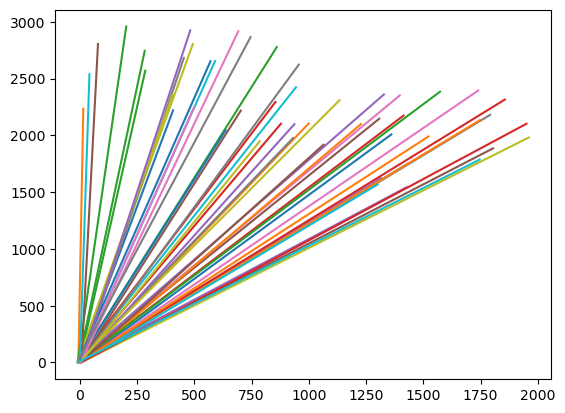

In [22]:
#50 linear
import numpy as np
import matplotlib.pyplot as plt
import csv

filename = 'linear_trajectory.csv'
N = 50  # 물체의 수

# 초기 위치, 초기 속도 설정
x0 = np.random.uniform(low=-10, high=10, size=(N, 1))
y0 = np.random.uniform(low=0, high=20, size=(N, 1))
v0 = np.random.uniform(low=20, high=30, size=(N, 1))
theta0 = np.random.uniform(low=np.pi/4, high=np.pi/2, size=(N, 1))
vx0 = v0 * np.cos(theta0) # 초기 x방향 속도
vy0 = v0 * np.sin(theta0) # 초기 y방향 속도

dt = 0.1  # 시간 간격
T = 10  # 시뮬레이션 시간

# trajectory 배열 초기화
if T == 10:
    trajectory = np.zeros((N, int(T/dt)+1, 2)) 
else:
    trajectory = np.zeros((N, int(T/dt), 2))  

trajectory[:, 0] = np.hstack((x0, y0))

for t in range(1, trajectory.shape[1]):
    x = x0 + vx0*t
    y = y0 + vy0*t
    trajectory[:, t] = np.hstack((x, y))

# id별 평균 가속도 구하기
acceleration = np.zeros((N, 2))
for i in range(N):
    vx = (trajectory[i, 1:, 0] - trajectory[i, :-1, 0]) / dt # x방향 속도
    vy = (trajectory[i, 1:, 1] - trajectory[i, :-1, 1]) / dt # y방향 속도
    ax = (vx[1:] - vx[:-1]) / dt # x방향 가속도
    ay = (vy[1:] - vy[:-1]) / dt # y방향 가속도
    acceleration[i] = [round(np.mean(ax),2), round(np.mean(ay),2)]
print(acceleration)

# csv 파일로 저장
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['time', 'id', 'x', 'y'])

    for i in range(N):
        for t in range(trajectory.shape[1]):
            writer.writerow([t*dt, i, trajectory[i, t, 0], trajectory[i, t, 1]])

# 결과 그래프 출력
for i in range(N):
    plt.plot(trajectory[i, :, 0], trajectory[i, :, 1])
plt.show()


In [29]:
#linear trajectoy(id별로 구분) : json 
import numpy as np
import json

filename = 'linear_trajectory.json'
N = 50  # 물체의 수

# 초기 위치, 초기 속도 설정
x0 = np.random.uniform(low=-10, high=10, size=(N, 1))
y0 = np.random.uniform(low=0, high=20, size=(N, 1))
v0 = np.random.uniform(low=20, high=30, size=(N, 1))
theta0 = np.random.uniform(low=np.pi/4, high=np.pi/2, size=(N, 1))
vx0 = v0 * np.cos(theta0)
vy0 = v0 * np.sin(theta0)

dt = 1  # 시간 간격
T = 10  # 시뮬레이션 시간

# trajectory 배열 초기화
if T == 10:
    trajectory = np.zeros((N, int(T/dt)+1, 2))
else:
    trajectory = np.zeros((N, int(T/dt), 2))

trajectory[:, 0] = np.hstack((x0, y0))

for t in range(1, trajectory.shape[1]):
    x = x0 + vx0*t
    y = y0 + vy0*t
    trajectory[:, t] = np.hstack((x, y))

# json 파일로 저장
trajectory_dict = {}
for i in range(N):
    traj_dict = {}
    for t in range(trajectory.shape[1]):
        traj_dict[t*dt] = [trajectory[i, t, 0], trajectory[i, t, 1]]
    trajectory_dict[str(i)] = traj_dict

with open(filename, 'w') as jsonfile:
    json.dump(trajectory_dict, jsonfile)



## 2.1 find acceleration

In [9]:
import json

json_data = '{"0": {"0": [2.155918114327962, 17.486568679589197],"1": [12.576943697176022, 40.67124118314132],"2": [22.99796928002408, 63.85591368669345],"3": [33.41899486287214, 87.04058619024558],"4": [43.8400204457202, 110.2252586937977],"5": [54.26104602856826, 133.4099311973498],"6": [64.68207161141632, 156.59460370090196],"7": [75.10309719426438, 179.77927620445408],"8": [85.52412277711244, 202.9639487080062],"9": [95.9451483599605, 226.14862121155832],"10": [106.36617394280856, 249.33329371511044]}}'

data = json.loads(json_data)

# extract the position data
positions = list(data['0'].values())

# calculate the velocity and acceleration
velocity = []
acceleration = []
for i in range(len(positions)-1):
    # calculate the time difference between two consecutive positions
    delta_t = 1.0
    
    # calculate the velocity: v = (x2 - x1) / t
    v = [(positions[i+1][j] - positions[i][j]) / delta_t for j in range(2)]
    velocity.append(v)
    
    # calculate the acceleration: a = (v2 - v1) / t
    if i > 0:
        a = [round((velocity[i][j] - velocity[i-1][j]),2) / delta_t for j in range(2)]
        acceleration.append(a)

print(acceleration)

[[-0.0, 0.0], [0.0, 0.0], [0.0, -0.0], [0.0, -0.0], [0.0, 0.0], [0.0, -0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


# 3. Calculate g and classify with linear and parabolic

## 3.1 Based on linear trajectory data : Identify if it's linear or parabolic 

In [34]:
import csv
import numpy as np

filename = 'linear_trajectory.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)
ids = np.unique(data[:, 1])  # 물체 id 목록

is_linear = []

# 물체별로 중력 가속도 계산하기
for id in ids:
    idx = np.where(data[:, 1] == id)[0]
    t = data[idx, 0]
    y = data[idx, 3]
    v = np.diff(y) # v
    g = np.diff(v) # g
    avg_g = np.mean(g)  # 평균 중력 가속도

    print(f'{id} 평균 중력 가속도: {avg_g}')
    print(f"물체 {id}의 평균 중력 가속도는 약 {avg_g:.2f} m/s^2입니다.")
    
    if round(avg_g,2) == 0 : 
        is_linear.append(True)
        print(f'Trajectory {id} is a linear motion')
    else :
        is_linear.append(False)
        print(f'Trajectory {id} is a parabolic motion')
        
print(is_linear)


0.0 평균 중력 가속도: -1.1483518961779398e-15
물체 0.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 0.0 is a linear motion
1.0 평균 중력 가속도: 1.1842378929335002e-15
물체 1.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 1.0 is a linear motion
2.0 평균 중력 가속도: 3.732143662578304e-15
물체 2.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 2.0 is a linear motion
3.0 평균 중력 가속도: 2.4402477793781218e-15
물체 3.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 3.0 is a linear motion
4.0 평균 중력 가속도: -3.409169691778258e-16
물체 4.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 4.0 is a linear motion
5.0 평균 중력 가속도: 1.0765799026668185e-16
물체 5.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 5.0 is a linear motion
6.0 평균 중력 가속도: -2.5479057696448035e-15
물체 6.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 6.0 is a linear motion
7.0 평균 중력 가속도: 1.4354398702224247e-16
물체 7.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 7.0 is a linear motion
8.0 평균 중력 가속도: 3.552713678800501e-15
물체 8.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 8.0 is a linear motion
9.0 평균 중력 가속도: 2.22493179

## 3.2 Based on parabolic trajectory data : Identify if it is linear or parabolic

In [36]:
import csv
import numpy as np

filename = 'merged_file_4d.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)
ids = np.unique(data[:, 1])  # 물체 id 목록

is_linear = [] 

# 물체별로 중력 가속도 계산하기
for id in ids:
    idx = np.where(data[:, 1] == id)[0]
    t = data[idx, 0]
    y = data[idx, 3]
    v = np.diff(y) # v
    g = np.diff(v) # g
    avg_g = np.mean(g)  # 평균 중력 가속도 

    print(f'{id} 평균 중력 가속도: {avg_g}')
    print(f"물체 {id}의 평균 중력 가속도는 약 {avg_g:.2f} m/s^2입니다.")
    
    if round(avg_g,2) == 0 : 
        is_linear.append(True)
        print(f'Trajectory {id} is a linear motion')
    else :
        is_linear.append(False)
        print(f'Trajectory {id} is a parabolic motion')
        
#print(is_linear)

0.0 평균 중력 가속도: -4.949495681991969e-09
물체 0.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 0.0 is a linear motion
1.0 평균 중력 가속도: 8.76768043576933e-09
물체 1.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 1.0 is a linear motion
2.0 평균 중력 가속도: -2.222220683561869e-09
물체 2.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 2.0 is a linear motion
3.0 평균 중력 가속도: -2.0505057225685535e-09
물체 3.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 3.0 is a linear motion
4.0 평균 중력 가속도: 7.272726869667517e-09
물체 4.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 4.0 is a linear motion
5.0 평균 중력 가속도: 2.080809006580845e-09
물체 5.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 5.0 is a linear motion
6.0 평균 중력 가속도: -1.4040403048952474e-09
물체 6.0의 평균 중력 가속도는 약 -0.00 m/s^2입니다.
Trajectory 6.0 is a linear motion
7.0 평균 중력 가속도: 5.353524312969893e-10
물체 7.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 7.0 is a linear motion
8.0 평균 중력 가속도: 5.313131680969775e-09
물체 8.0의 평균 중력 가속도는 약 0.00 m/s^2입니다.
Trajectory 8.0 is a linear motion
9.0 평균 중력 가속도: 2.12121197374

# 4. Logistic Regression

In [9]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


filename = 'merged_file.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)
ids = np.unique(data[:, 1])


X = []
y = []


for id in ids:
    idx = np.where(data[:, 1] == id)[0]
    t = data[idx, 0]
    y_vals = data[idx, 3]
    v = np.diff(y_vals) 
    g = np.diff(v)
    avg_g = np.mean(g)
#    print(round(avg_g,2))
#    print(avg_g)
#    print(f"물체 {id}의 평균 중력 가속도는 {avg_g:.2f} m/s^2입니다.")

    # 직선운동인 경우 0, 그렇지 않은 경우 1로 클래스 레이블 지정
    if round(avg_g,2) == 0.0 or -0.0 :
        label = 0
    else:
        label = 1
        
 
    X.append(avg_g)
    y.append(label)

X


[-5.555555225732355e-09,
 3.3333340038805344e-09,
 -5.777779045325183e-09,
 -2.6666649135778346e-09,
 -4.444445206925391e-09,
 -1.2222215338574136e-09,
 8.888887255883068e-09,
 2.222223195581642e-09,
 1.1111108082988923e-09,
 7.894919286223335e-16,
 -3.3333312406587843e-09,
 -1.333333443653828e-09,
 6.666666428777211e-09,
 3.4444431504551982e-09,
 -8.888886466391138e-09,
 1.1842378929335002e-15,
 5.555553646748497e-09,
 -2.2222228008356777e-09,
 4.999999624209926e-09,
 8.888887255883068e-09,
 2.2222066162511409e-10,
 -4.444445996417319e-09,
 2.8888883384246986e-09,
 -3.777780064082334e-09,
 -7.999998688193147e-09,
 1.578983857244667e-15,
 1.1111033081255704e-10,
 1.6666648308374634e-09,
 5.555555620478319e-09,
 -1.5555533157870134e-09,
 -5.555554830986391e-09,
 6.555554716353779e-09,
 7.777777631822069e-09,
 -4.333334086620905e-09,
 -6.6666656392852826e-09,
 -1.1111108082988923e-09,
 -3.3333328196426413e-09,
 6.666671165728784e-10,
 1.1111112030448567e-09,
 9.888884970147652e-09,
 7.89

In [95]:
len(X)

100

In [96]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1,) # change y_train shape
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1,) # change y_test shape

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_test # 실제 값 (테스트 세트)


array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [98]:
y_pred # 예측 값

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [99]:
X_test # 평균 중력가속도 (테스트 세트)

array([[ 1.11110331e-10],
       [-1.00568442e+01],
       [-5.77777905e-09],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [ 5.55555365e-09],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [ 3.44444315e-09],
       [ 2.22222320e-09],
       [-5.55555483e-09],
       [ 2.88888834e-09],
       [-7.99999869e-09],
       [-4.33333409e-09],
       [ 1.11111081e-09],
       [-2.22221964e-09],
       [-1.00568442e+01],
       [-2.66666491e-09],
       [-1.00568442e+01],
       [-5.55555562e-09],
       [ 1.11110883e-09],
       [ 8.88888726e-09],
       [-1.00568442e+01],
       [-1.00568442e+01],
       [-1.00568442e+01]])

In [100]:
clf.score(X_test, y_test) # 모델 평가

1.0

## 데이터 시각화 / train data, test data

In [101]:
X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성
X_range

array([-10.05684421,  -9.95684421,  -9.85684421,  -9.75684421,
        -9.65684421,  -9.55684421,  -9.45684421,  -9.35684421,
        -9.25684421,  -9.15684421,  -9.05684421,  -8.95684421,
        -8.85684421,  -8.75684421,  -8.65684421,  -8.55684421,
        -8.45684421,  -8.35684421,  -8.25684421,  -8.15684421,
        -8.05684421,  -7.95684421,  -7.85684421,  -7.75684421,
        -7.65684421,  -7.55684421,  -7.45684421,  -7.35684421,
        -7.25684421,  -7.15684421,  -7.05684421,  -6.95684421,
        -6.85684421,  -6.75684421,  -6.65684421,  -6.55684421,
        -6.45684421,  -6.35684421,  -6.25684421,  -6.15684421,
        -6.05684421,  -5.95684421,  -5.85684421,  -5.75684421,
        -5.65684421,  -5.55684421,  -5.45684421,  -5.35684421,
        -5.25684421,  -5.15684421,  -5.05684421,  -4.95684421,
        -4.85684421,  -4.75684421,  -4.65684421,  -4.55684421,
        -4.45684421,  -4.35684421,  -4.25684421,  -4.15684421,
        -4.05684421,  -3.95684421,  -3.85684421,  -3.75

In [102]:
p = 1 / (1 + np.exp(-(clf.coef_ * X_range + clf.intercept_))) # y = mx + b
p

array([[0.99676254, 0.99637322, 0.99593727, 0.99544917, 0.99490272,
        0.99429103, 0.99360641, 0.99284028, 0.99198309, 0.9910242 ,
        0.98995179, 0.98875269, 0.98741232, 0.98591449, 0.98424128,
        0.98237285, 0.98028734, 0.97796062, 0.97536618, 0.97247492,
        0.969255  , 0.96567172, 0.96168732, 0.95726092, 0.95234847,
        0.94690269, 0.9408732 , 0.93420659, 0.92684676, 0.91873526,
        0.90981184, 0.90001521, 0.88928393, 0.87755756, 0.86477805,
        0.85089136, 0.83584928, 0.81961144, 0.80214756, 0.78343969,
        0.76348447, 0.74229531, 0.71990426, 0.69636354, 0.67174645,
        0.6461477 , 0.61968289, 0.59248707, 0.56471257, 0.53652587,
        0.50810383, 0.4796293 , 0.45128651, 0.4232563 , 0.39571154,
        0.36881305, 0.34270604, 0.3175174 , 0.29335385, 0.27030089,
        0.24842265, 0.2277625 , 0.20834427, 0.19017386, 0.17324137,
        0.15752325, 0.14298458, 0.12958138, 0.11726267, 0.10597246,
        0.0956515 , 0.08623877, 0.07767275, 0.06

In [103]:
p.shape

(1, 101)

In [104]:
X_range.shape

(101,)

In [105]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(101,)

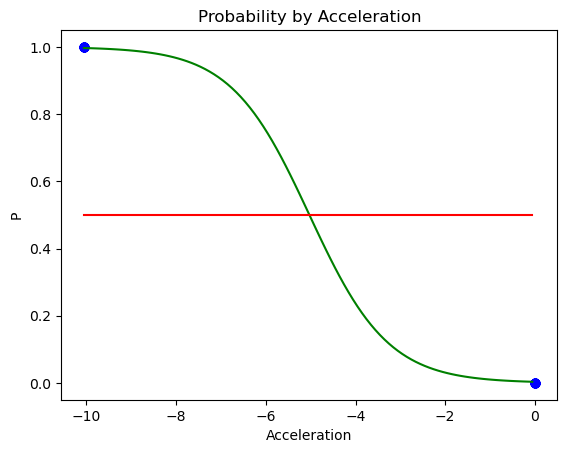

In [106]:
import matplotlib.pyplot as plt

#train data
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('P')
plt.show()

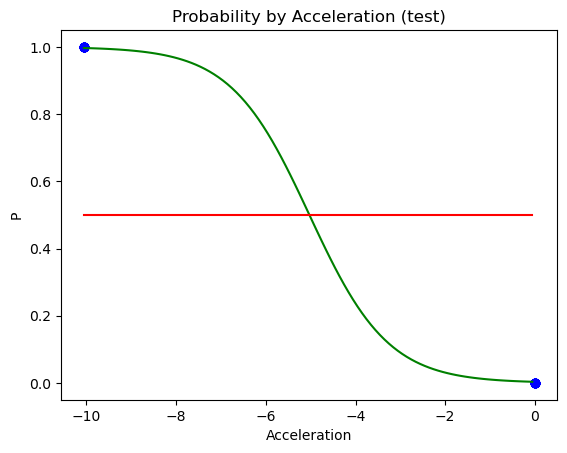

In [107]:
#test data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.title('Probability by Acceleration (test)')
plt.xlabel('Acceleration')
plt.ylabel('P')
plt.show()

## 모델 예시

In [110]:
clf.predict_proba([[-6]]) # 평균중력가속도가 -6일 때 확률 (모델에서는 75% 확률로 포물선)

array([[0.24841059, 0.75158941]])